In [2]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
# read the test and train data files
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train4_df = train_df.iloc[:,:]
valid4_df = valid_df.iloc[:, :]
test4_df = test_df.iloc[:, 1:]

In [5]:
train4_df.drop(columns=["label_1", "label_2", "label_3"], inplace=True)
valid4_df.drop(columns=["label_1", "label_2", "label_3"], inplace=True)

In [6]:
# splitting the test and train datasets into X and Y values
X4_train= train4_df.iloc[:,0:-1].values
Y4_train = train4_df.iloc[:,-1].values
X4_valid = valid4_df.iloc[:,0:-1].values
Y4_valid = valid4_df.iloc[:,-1].values
X4_test = test4_df.iloc[:,:].values

In [7]:
# scalling and fitting data
scaler = StandardScaler()
scaler.fit(X4_train)

X4_train = scaler.transform(X4_train)
X4_valid = scaler.transform(X4_valid)
X4_test = scaler.transform(X4_test)

In [8]:
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Support Vector Machine", SVC(kernel="linear"))
]


# Iterate over each classifier and perform cross-validation
for clf_name, clf in classifiers:
    cross_val_scores = cross_val_score(clf, X4_train, Y4_train, cv=5)
    
    # Print the cross-validation scores for each classifier
    print(f"{clf_name} Cross-validation scores:", cross_val_scores)
    
    # Calculate and print the mean and standard deviation of the scores
    print(f"{clf_name} Mean accuracy:", cross_val_scores.mean())
    print(f"{clf_name} Standard deviation:", cross_val_scores.std())
    print("\n")

Random Forest Cross-validation scores: [0.72931276 0.73334502 0.73895512 0.74824684 0.74000701]
Random Forest Mean accuracy: 0.7379733520336605
Random Forest Standard deviation: 0.006435394884854459


K-Nearest Neighbors Cross-validation scores: [0.85203366 0.81153576 0.84186536 0.83976157 0.80382188]
K-Nearest Neighbors Mean accuracy: 0.8298036465638148
K-Nearest Neighbors Standard deviation: 0.018695381241664737


Support Vector Machine Cross-validation scores: [0.8693899  0.85255961 0.84396914 0.86991585 0.83046985]
Support Vector Machine Mean accuracy: 0.8532608695652174
Support Vector Machine Standard deviation: 0.015124765768922367




In [9]:
# Initialize and train a Support Vector Machine classifier
model =  RandomForestClassifier()
model.fit(X4_train, Y4_train)

# Make predictions on the test set
y_pred = model.predict(X4_valid)

print(classification_report(Y4_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       0.50      0.09      0.15        11
          12       0.50      0.08      0.13        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.12      0.08      0.08       750
weighted avg       0.53      0.71      0.60       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<Axes: title={'center': 'Imbalanced data'}, xlabel='label_4'>

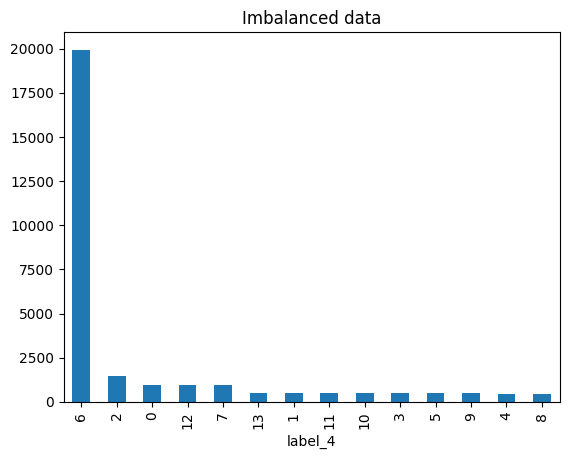

In [10]:
train4_df['label_4'].value_counts().plot(kind='bar',title='Imbalanced data')

In [11]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# resampling the data
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(random_state=0)
X4_train, Y4_train = resampler.fit_resample(X4_train, Y4_train)

In [13]:
# Initialize and train a Support Vector Machine classifier
model.fit(X4_train, Y4_train)

# Make predictions on the test set
y_pred = model.predict(X4_valid)

print(classification_report(Y4_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.05      0.07      0.06       750
weighted avg       0.50      0.71      0.59       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [14]:
# Create a SelectKBest instance with a scoring function (e.g., chi-squared)
selector = SelectKBest(score_func=f_classif, k=400)  # Select the top 2 features

# Fit and transform your data to select the best k features
X4_best_train = selector.fit_transform(X4_train, Y4_train)
X4_best_valid = selector.transform(X4_valid)
X4_best_test = selector.transform(X4_test)

In [15]:
model.fit(X4_best_train, Y4_train)

# Make predictions on the test set
y_pred = model.predict(X4_best_valid)

print(classification_report(Y4_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.05      0.07      0.06       750
weighted avg       0.50      0.71      0.59       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [16]:
preds_before_PCA = model.predict(X4_best_test)
data_frame = pd.DataFrame(preds_before_PCA, columns=["label_4"])
data_frame.to_csv(f"190110V_4_1.csv",na_rep='')

In [20]:
pca=PCA(0.95)
pca = pca.fit(X4_best_train)

x4_train_pca=pca.fit_transform(X4_best_train)
x4_valid_pca = pca.transform(X4_best_valid)
x4_test_pca = pca.transform(X4_best_test)

In [18]:
model.fit(x4_train_pca, Y4_train)

# Make predictions on the test set
y_pred = model.predict(x4_valid_pca)

print(classification_report(Y4_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       1.00      0.09      0.17        11
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.12      0.08      0.07       750
weighted avg       0.52      0.71      0.59       750



/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poorna/miniconda3/envs/lab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [21]:
preds_after_PCA = model.predict(x4_test_pca)
data_frame = pd.DataFrame(preds_after_PCA, columns=["label_4"])
data_frame.to_csv(f"190110V_4_2.csv",na_rep='')

In [23]:
x4_train_pca.shape

(279132, 113)

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],     # Regularization parameter
    'penalty': ['l1', 'l2'],           # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear', 'saga'],   # Algorithm to use in the optimization problem
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data to find the best hyperparameters
grid_search.fit(x4_train_pca, Y4_train)

# Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x4_valid_pca)
test_preds = best_model.predict(x4_test_pca)

print(classification_report(Y1_valid, y_pred))

In [ ]:
data_frame = pd.DataFrame(test_preds, columns=["label_4"])
data_frame.to_csv(f"190110V_4.csv",na_rep='')